# Orbits of bitangents on symmetric quartics

## Table of contents
1. [Introduction](#introduction)
2. [Functions](#functions)
3. [Type I: The Klein ($\text{PSL}_2(7)$) quartic](#klein)
4. [Type II: The Clebsch](#fermat)
5. [Type III: The (48,33) quartic](#type3)
6. [Type IV: The $S_4$ quartic](#S4)
7. [Type V: The (16,13) quartic](#1613)
8. [Type VI: The $C_9$ quartic](#C9)
9. [Type VII: The $D_8$ quartic](#D8)
10. [Type IX: The $S_3$ quartic](#S3)
11. [Type X: The $K_4$ quartic](#K4)
12. [Type XI: The $C_3$ quartic](#C3)
13. [Type XII: The $C_2$ quartic](#C2)

# Introduction<a name="introduction"></a>
The following code is taken from [Vinzant's webpage](http://sites.math.washington.edu/~vinzant/research/quartics/quartictype.sage) from [her research on quartics](http://sites.math.washington.edu/~vinzant/research/quartics.html) with Plaumann and Sturmfels. It inputs a quartic polynomial and outputs (among other things) equations for its tritangents.

In [1]:
%run Automorphism_Groups.ipynb

# Functions<a name="functions"></a>

In [2]:
F=QQ; T.<x,y,z>=PolynomialRing(F,order='degrevlex')

# The following function inputs a homogeneous quartic in QQ[x,y,z],
# and outputs the 28 bitangents
def compute_bitangents(f):
    F=QQ; T.<x,y,z>=PolynomialRing(F)
    
    # Check whether the quartic is smooth
    Grad=ideal(f,diff(f,x),diff(f,y),diff(f,z))
    if not Grad.dimension()==0:
        sys.exit("Quartic is not smooth!")

    # Create a new polynomial ring with variables a,b (for the bitangent) and a0,..,a4 (TODO)
    R.<x,y,z,a,b,a0,a1,a2,a3,a4>=PolynomialRing(F)
    f0=f.base_extend(R)
    S.<a,b>=PolynomialRing(F)
    digits=50
    threshold=0.000000000001
    almostzero=threshold

    # Take an abstract line with equation ax+by+z
    Line= a*x+b*y+z;
    puresquare=ideal(a0*a3^2-a1^2*a4,8*a0^2*a3-4*a0*a1*a2+a1^3,8*a1*a4^2-4*a2*a3*a4+a3^3,8*a0*a1*a4-4*a0*a2*a3+a1^2*a3,8*a0*a3*a4-4*a1*a2*a4+a1*a3^2,16*a0^2*a4+2*a0*a1*a3-4*a0*a2^2+a1^2*a2,16*a0*a4^2+2*a1*a3*a4-4*a2^2*a4+a2*a3^2);

    # Consider the resultant of the equation of the line with respect to z.
    Res=f0.resultant(Line,z)    
    Res=Res.subs(y=1)    
    phi=hom(R,S,[0,0,0,a,b,Res.coefficient({x:0}),Res.coefficient({x:1}),Res.coefficient({x:2}),Res.coefficient({x:3}),Res.coefficient({x:4})])
    
    bit1 = phi(puresquare)     
    
    I_ideal=singular.groebner(singular(bit1))
    singular.lib('solve.lib')
    VRing=singular.solve(I_ideal,digits)
    singular.set_ring(VRing)
    B1=singular("SOL")
    
    nreal1=0
    Bitangents=[]
    RealBitangents=[]
    for k in [1..len(B1)]:
        real=0;
        if ((B1[k][1].impart()).absValue()<threshold) and ((B1[k][2].impart()).absValue()<threshold): 
            real=1
            RealBitangents=RealBitangents+[(float(B1[k][1].repart())+float(B1[k][1].impart())*i)*x+(float(B1[k][2].repart())+float(B1[k][2].impart())*i)*y+z]
        nreal1=nreal1+real
        Bitangents=Bitangents+[(float(B1[k][1].repart())+float(B1[k][1].impart())*i)*x+(float(B1[k][2].repart())+float(B1[k][2].impart())*i)*y+z]
    Line=a*x+y     
    Res=f0.resultant(Line,y)    
    Res=Res.subs(z=1)   
    phi=hom(R,S,[0,0,0,a,0,Res.coefficient({x:0}),Res.coefficient({x:1}),Res.coefficient({x:2}),Res.coefficient({x:3}),Res.coefficient({x:4})])  
    bit2=phi(puresquare)+ideal(b)
    
    if dimension(bit2)==-1: nreal2=0
    else: 
          I_ideal=singular.groebner(singular(bit2))
          singular.lib('solve.lib')
          VRing=singular.solve(I_ideal,digits)
          singular.set_ring(VRing)
          B2=singular("SOL")
          nreal2=0
          for k in [1..len(B2)]:
                real=0
                if ((B2[k][1].impart()).absValue()<threshold) and ((B2[k][2].impart()).absValue()<threshold):
                    real=1
                    RealBitangents=RealBitangents+[(float(B2[k][1].repart())+float(B2[k][1].impart())*i)*x+y]
                nreal2=nreal2+real  
                Bitangents=Bitangents+[(float(B2[k][1].repart())+float(B2[k][1].impart())*i)*x+y]
    
    Res=f0.resultant(x)
    Res=Res.subs(z=1)
    phi=hom(R,F,[0,0,0,0,0,Res.coefficient({y:0}),Res.coefficient({y:1}),Res.coefficient({y:2}),Res.coefficient({y:3}),Res.coefficient({y:4})])  
    bit3=phi(puresquare)
    if bit3==ideal(0):
        nreal3=1
        Bitangents=Bitangents+[x]
        RealBitangents=RealBitangents+[x]
    else: nreal3=0
    
    NRealBit=nreal1+nreal2+nreal3
    if len(Bitangents)!=28:
        return OSError("Something has gone wrong. We found "+str(len(Bitangents))+" bitangents")
    # print("The quartic has 28 bitangets, stored in 'Bitangents', and "+str(NRealBit)+" real bitangents, stored in 'RealBitangents'.")
    
    return Bitangents

In [3]:
from sage.symbolic.expression_conversions import polynomial

# Round complex numbers
def round_cx(z0,n):
    return float(round(z0.real(),n)) + float(round(z0.imag(),n))*I

# The following inputs a line ax+by+cz and outputs the tuple of coefficients [a,b,c]
# Note that line.coefficients() has errors, in that a line line 3y+2z will output [3,2] rather than [0,3,2] which is what we want
def line_to_coeffs(bitangent):
    return [CC(bitangent.coefficient({x:1})), CC(bitangent.coefficient({y:1})),CC(bitangent.coefficient({z:1}))]

# Turn a list of three coefficients [a,b,c] into the polynomial ax+by+cz=0
def coeffs_to_line(list_of_coeffs):
    return x*list_of_coeffs[0] + y*list_of_coeffs[1] + z*list_of_coeffs[2]

# Provide a normalized version of the bitangent -- old (working) version
# def normalize(bitangent):
#     b = bitangent.change_ring(ComplexField(30))
#     if b.coefficients()[0] != 0:
#         c = b*(1/b.coefficients()[0])
#         if len(c.coefficients())==3:
#             new_coeffs = [round_cx(a,5) for a in c.coefficients()]
#             c = new_coeffs[0]*x + new_coeffs[1]*y + new_coeffs[2]*z
#         return c
#     return b



# Provide a normalized version of the bitangent
def normalize(bitangent):
    # Base change to CC
    b = bitangent.change_ring(ComplexField(30))

    # If the x-coordinate is nonzero mod out by it
    if line_to_coeffs(b)[0] != 0:
        c = b*(1/line_to_coeffs(b)[0])
    # Else mod out by the y-coordinate
    elif line_to_coeffs(b)[1] != 0:
        c = b*(1/line_to_coeffs(b)[1])
    # Or the z-coordinate
    else:
        c = b*(1/line_to_coeffs(b)[2])
    
    # Round the output coordinates and return a new line
    new_coeffs = [round_cx(a,4) for a in line_to_coeffs(c)]
    return coeffs_to_line(new_coeffs)


def compute_normalized_bitangents(f):
    return [normalize(b) for b in compute_bitangents(f)]

# Apply a matrix M to a line B = {ax+by+cy=0}
def gp_action(M,B):
    vec = matrix([[B.coefficient({x:1})],[B.coefficient({y:1})],[B.coefficient({z:1})]])
    output_mat = (M*vec).transpose()
    w = list(list(output_mat)[0])
    outputline = w[0]*x + w[1]*y + w[2]*z
    return normalize(outputline)

def extract_orbit(Bitangents,list_of_indices):
    orbit = [Bitangents[j] for j in list_of_indices]
    remaining_Bitangents = [b for b in Bitangents if b not in orbit]
    return orbit,remaining_Bitangents

We write some functions to make the equations of bitangents more readable and act on them via a subgroup $G\le \text{PGL}_3(\mathbb{C})$.

In [4]:
# We also add some commands we'll use throughout
def matrix_to_list(M):
    return [list(r) for r in M.rows()]

In [5]:
# Generates a candidate list of the orbit of an input bitangent under a list of group elements
def candidate_orbit(bitangent,list_of_gp_elements):
    output_list = [bitangent]
    isotropy_gens = []
    for M in list_of_gp_elements:
        output_list.append(gp_action(M,bitangent))
        if gp_action(M,bitangent) == bitangent:
            isotropy_gens.append(M)
    for line in output_list:
        print(line)
    print('I think isotropy is generated by:\n')
    for isotropy_elt in isotropy_gens:
        print(isotropy_elt)

In [6]:
def investigate_orbit(bitangent,group_dictionary):
    output_list = [bitangent]
    isotropy_gens = []
    # Iterate over the group
    for g in group_dictionary.keys():        
        output_list.append(gp_action(group_dictionary[g],bitangent))
        if gp_action(group_dictionary[g],bitangent) == bitangent:
            isotropy_gens.append(g)
    for line in set(output_list):
        print(line)
    print('I think isotropy is generated by:\n')
    for isotropy_elt in isotropy_gens:
        print(isotropy_elt)

In [7]:
def trim(bitangent):
    x_coeff = CC(bitangent.coefficient({x:1}));
    y_coeff = CC(bitangent.coefficient({y:1}));
    z_coeff = CC(bitangent.coefficient({z:1}));
    return round_cx(x_coeff,3)*x + round_cx(y_coeff,3)*y + round_cx(z_coeff,3)*z

def investigate_orbit_Klein(bitangent,group_dictionary):
    output_list = [bitangent]
    isotropy_gens = []
    # Iterate over the group
    for g in group_dictionary.keys():        
        output_list.append(trim(gp_action(group_dictionary[g],bitangent)))
        if trim(gp_action(group_dictionary[g],bitangent)) == trim(bitangent):
            isotropy_gens.append([g,group_dictionary[g]])

    # Output the orbits
    for line in set(output_list):
        print(line)

    # Output the isotropy
    print('I think isotropy is generated by:\n')
    for isotropy_elt in isotropy_gens:
        print(isotropy_elt)

In [8]:
############

def investigate_orbit_V(bitangent,group_dictionary):
    output_list = [bitangent]
    isotropy_gens = []
    # Iterate over the group
    for g in group_dictionary.keys():        
        output_list.append(gp_action(group_dictionary[g],bitangent))
        if gp_action(group_dictionary[g],bitangent) == bitangent:
            isotropy_gens.append([g,group_dictionary[g]])

    # Output the orbits
    for line in set(output_list):
        print(line)

    # Output the isotropy
    print('I think isotropy is generated by:\n')
    for isotropy_elt in isotropy_gens:
        print(isotropy_elt)
        # list_version = matrix_to_list(isotropy_elt)
        # # print(list_version)
        # output_list = []
        # for row in list_version:
        #     new_row = []
        #     for j in row:
        #         # every entry in the matx representation is either totally real or totally imaginary
        #         if j.real != 0:
        #             new_row.append(int(j.real()))
        #         elif j.imag != 0:
        #             new_row.append(int(j.imag())*I)
        #         else:
        #             print('error')
        #     output_list.append(new_row)
        # print(str(output_list) + ',')

# def investigate_orbit2(bitangent,group_dictionary):
#     output_list = [bitangent]
#     isotropy_gens = []
#     # Iterate over the group
#     for g in group_dictionary.keys():        
#         output_list.append(gp_action(group_dictionary[g],bitangent))
#         if gp_action(group_dictionary[g],bitangent) == bitangent:
#             isotropy_gens.append(group_dictionary[g])
#     for line in set(output_list):
#         print(line)
#     print('I think isotropy is generated by:\n')
#     for isotropy_elt in isotropy_gens:
#         print(isotropy_elt)

In [9]:
def investigate_orbit_S4(bitangent,group_dictionary):
    output_list = [bitangent]
    isotropy_gens = []
    # Iterate over the group
    for g in group_dictionary.keys():        
        output_list.append(gp_action(group_dictionary[g],bitangent))
        if gp_action(group_dictionary[g],bitangent) == bitangent:
            isotropy_gens.append(group_dictionary[g])
    for line in set(output_list):
        print(line)
    print('I think isotropy is generated by:\n')
    for isotropy_elt in isotropy_gens:
        list_version = matrix_to_list(isotropy_elt)
        output_list = []
        for row in list_version:
            new_row = []
            for j in row:
                new_row.append(int(j.real()))
            output_list.append(new_row)
        print(str(output_list) + ',')

In [10]:
def bitan_difference(bitan1,bitan2):
    # Take the difference in absolute value between each of the coefficients and sum these
    return abs(CC(bitan1.coefficient({x:1})) - CC(bitan2.coefficient({x:1}))) + abs(CC(bitan1.coefficient({y:1})) - CC(bitan2.coefficient({y:1}))) + abs(CC(bitan1.coefficient({z:1})) - CC(bitan2.coefficient({z:1})))

In [11]:
bitan1 =x + (-1.1234 - 4.9221*I)*y + (-2.9252 - 1.4087*I)*z
bitan2 =x + (-1.1231 - 4.9225*I)*y + (-2.9254 - 1.4091*I)*z
# bitan_difference(bitan1,bitan2)
bitan_difference(bitan1,bitan2)

0.000947213595499854

In [12]:
def same_bitangent(bitan1,bitan2, error_rate=0.01):
    if bitan_difference(bitan1,bitan2) < error_rate:
        return true
    else:
        return false


In [13]:
def investigate_orbit_NEW(bitangent,group_dictionary):
    output_list = [bitangent]

    for g in group_dictionary.keys():
        g_bitangent = gp_action(group_dictionary[g],bitangent)

        new_bitangent = True
        for b in output_list:
            if same_bitangent(g_bitangent,b):
                new_bitangent = False

        if new_bitangent == True:
            output_list.append(g_bitangent)
    return list(set(output_list))

def investigate_isotropy_NEW(bitangent,group_dictionary):
    isotropy_gens = []
    for g in group_dictionary.keys():
        # print(g)
        g_bitangent = gp_action(group_dictionary[g],bitangent)
        # print(g_bitangent)
        if same_bitangent(g_bitangent,bitangent):
            isotropy_gens.append(g)
    return isotropy_gens

We want to compute all the orbits of the bitangents for the [cubic surfaces found here](https://mat.uab.cat/~francesc/mates/autgen3.pdf).b

TODO -- FIX EVERYTHING ABOVE HERE/RENAME FUNCTIONS/ETC

# Type I: The Klein quartic<a name="klein"></a>
Our first quartic is the *Klein quartic*, defined by the equation
$$x^3y + y^3z + z^3x$$
This has the largest possible automorphism group, encoded as `PSL_dict` here.

It is a classical fact that the automorphism group of the Klein quartic acts transitively on its 28 bitangents, however we can also observe this computationally. We first compute a list of all the bitangents of the Klein quartic.

In [14]:
Klein = x^3*y + y^3*z + z^3*x;
Klein_Bitangents = compute_normalized_bitangents(Klein);Klein_Bitangents

[x + 0.308*y + 1.555*z,
 x + y + z,
 x + 5.0489*y + 3.247*z,
 x + 0.6431*y + 0.1981*z,
 x + (0.401 + 0.5028*I)*y + (-0.0441 - 0.1931*I)*z,
 x + (0.401 - 0.5028*I)*y + (-0.0441 + 0.1931*I)*z,
 x + (3.1479 + 3.9474*I)*y + (-0.7225 - 3.1656*I)*z,
 x + (3.1479 - 3.9474*I)*y + (-0.7225 + 3.1656*I)*z,
 x + (0.6235 + 0.7818*I)*y + (-0.2225 - 0.9749*I)*z,
 x + (0.6235 - 0.7818*I)*y + (-0.2225 + 0.9749*I)*z,
 x + (-0.5794 + 0.279*I)*y + (0.1235 + 0.1549*I)*z,
 x + (-0.5794 - 0.279*I)*y + (0.1235 - 0.1549*I)*z,
 x + (-4.5489 + 2.1906*I)*y + (2.0245 + 2.5386*I)*z,
 x + (-4.5489 - 2.1906*I)*y + (2.0245 - 2.5386*I)*z,
 x + (-0.901 + 0.4339*I)*y + (0.6235 + 0.7818*I)*z,
 x + (-0.901 - 0.4339*I)*y + (0.6235 - 0.7818*I)*z,
 x + (0.192 + 0.2408*I)*y + (-0.346 - 1.516*I)*z,
 x + (0.192 - 0.2408*I)*y + (-0.346 + 1.516*I)*z,
 x + (-0.2775 + 0.1336*I)*y + (0.9695 + 1.2157*I)*z,
 x + (-0.2775 - 0.1336*I)*y + (0.9695 - 1.2157*I)*z,
 x + (-0.0685 - 0.3003*I)*y + (-1.401 - 0.6747*I)*z,
 x + (-0.0685 + 0.3003*I

We can look at the first bitangent `Klein_Bitangents[0]`, and try to examine what its orbit is under the action of the automorphism group using our `investigate_orbit` command:

In [15]:
investigate_orbit_NEW(Klein_Bitangents[0],PSL_dict)

[x + (3.1478 + 3.9472*I)*y + (-0.7225 - 3.1654*I)*z,
 x + 0.6431*y + 0.1981*z,
 x + (-0.901 + 0.4339*I)*y + (0.6235 + 0.7818*I)*z,
 x + (-0.901 - 0.4339*I)*y + (0.6235 - 0.7819*I)*z,
 x + 5.0487*y + 3.2468*z,
 x + (3.1478 - 3.9472*I)*y + (-0.7225 + 3.1654*I)*z,
 x + (-0.2775 + 0.1336*I)*y + (0.9695 + 1.2157*I)*z,
 x + (-4.5487 + 2.1905*I)*y + (2.0243 + 2.5384*I)*z,
 x + (-0.2775 - 0.1336*I)*y + (0.9695 - 1.2157*I)*z,
 x + (-0.5794 - 0.279*I)*y + (0.1235 - 0.1549*I)*z,
 x + (-0.1431 - 0.627*I)*y + (-0.1785 - 0.0859*I)*z,
 x + (0.401 + 0.5028*I)*y + (-0.0441 - 0.1931*I)*z,
 x + (-0.1431 + 0.627*I)*y + (-0.1785 + 0.0859*I)*z,
 x + (0.401 - 0.5028*I)*y + (-0.0441 + 0.1931*I)*z,
 x + (-0.5794 + 0.279*I)*y + (0.1235 + 0.1549*I)*z,
 x + (-0.2225 - 0.9749*I)*y + (-0.901 - 0.4339*I)*z,
 x + (0.6235 + 0.7818*I)*y + (-0.2225 - 0.9749*I)*z,
 x + (-0.2226 + 0.9749*I)*y + (-0.901 + 0.4339*I)*z,
 x + (0.6235 - 0.7818*I)*y + (-0.2225 + 0.9749*I)*z,
 x + (-1.1234 - 4.9221*I)*y + (-2.9252 - 1.4087*I)*z,

It is clear to see that we get all 28 bitangents in the orbit of the first one under the action of $\text{PSL}_2(7)$. It remains to ask what the isotropy group of a single bitangent is --- since the action is transitive, we should obtain an index 48 subgroup in $\text{PSL}_2(7)$.

In [16]:
investigate_isotropy_NEW(compute_normalized_bitangents(Klein)[0],PSL_dict)

['r14', 'r57', 'r122', 'r124', 'r126', 'r164']

We can then return to GAP and verify that these matrices generate a subgroup of $\text{PSL}_2(7)$ which is isomorphic to $S_3$. Therefore as a $\text{PSL}_2(7)$-set, the 28 bitangents of the Klein quartic are in equivariant bijection with the left cosets $[\text{PSL}_2(7)/S_3]$. As a sanity check, $|\text{PSL}_2(7)| = 168$ and $|S_3| = 6$, and $168/6 = 28$.

# Type II: Fermat<a href="fermat"></a>

## (II) Bitangents

In [17]:
F=QQ; T.<x,y,z>=PolynomialRing(F)
Fermat = x^4 + y^4 + z^4

Fermat_Bitangents = compute_normalized_bitangents(Fermat);Fermat_Bitangents

[y + (-0.7071 - 0.7071*I)*z,
 y + (-0.7071 + 0.7071*I)*z,
 y + (0.7071 + 0.7071*I)*z,
 y + (0.7071 - 0.7071*I)*z,
 x + y - z,
 x - y + z,
 x + 1.0*I*y + (-1.0*I)*z,
 x + (-1.0*I)*y + 1.0*I*z,
 x + (-0.7071 - 0.7071*I)*z,
 x + (-0.7071 + 0.7071*I)*z,
 x + (0.7071 + 0.7071*I)*z,
 x + (0.7071 - 0.7071*I)*z,
 x - y - z,
 x + y + z,
 x + (-1.0*I)*y + (-1.0*I)*z,
 x + 1.0*I*y + 1.0*I*z,
 x + 1.0*I*y - z,
 x + (-1.0*I)*y + z,
 x - y + (-1.0*I)*z,
 x + y + 1.0*I*z,
 x + (-1.0*I)*y - z,
 x + 1.0*I*y + z,
 x + y + (-1.0*I)*z,
 x - y + 1.0*I*z,
 x + (-0.7071 - 0.7071*I)*y,
 x + (-0.7071 + 0.7071*I)*y,
 x + (0.7071 + 0.7071*I)*y,
 x + (0.7071 - 0.7071*I)*y]

Again, we can look at the orbit of the first bitangent:

In [18]:
investigate_orbit_NEW(Fermat_Bitangents[0],Fermat_dict)

[x + (-0.7071 + 0.7071*I)*z,
 x + (-0.7071 - 0.7071*I)*z,
 y + (0.7071 - 0.7071*I)*z,
 y + (-0.7071 + 0.7071*I)*z,
 y + (-0.7071 - 0.7071*I)*z,
 y + (0.7071 + 0.7071*I)*z,
 x + (-0.7071 - 0.7071*I)*y,
 x + (0.7071 + 0.7071*I)*y,
 x + (0.7071 - 0.7071*I)*y,
 x + (-0.7071 + 0.7071*I)*y,
 x + (0.7071 - 0.7071*I)*z,
 x + (0.7071 + 0.7071*I)*z]

Hence we get 12 bitangents in this orbit. In terms of the indices of the list `Fermat_Bitangents`, these are the entries `[0,1,2,3,24,25,26,27,8,9,10,11]`. Again we can investigate the isotropy:

In [19]:
investigate_isotropy_NEW(Fermat_Bitangents[0],Fermat_dict)

['r6', 'r7', 'r72', 'r77', 'r81', 'r82', 'r91', 'r92']

Going back to GAP, we get a copy of $C_8$ living inside the automorphism group of the Fermat quartic. Hence the 12 bitangents above correspond to the transitive set $[C_4^{\times 2}\rtimes S_3 / C_8]$.

We can look at the remaining bitangents, for instance the element `Fermat_Bitangents[4]` which was not in the orbit above:

In [20]:
investigate_orbit_NEW(Fermat_Bitangents[4],Fermat_dict)

[x - y - z,
 x + (-1.0*I)*y + (-1.0*I)*z,
 x + (-1.0*I)*y + z,
 x - y + (-1.0*I)*z,
 x - y + z,
 x + 1.0*I*y - z,
 x + y + 1.0*I*z,
 x + 1.0*I*y + (-1.0*I)*z,
 x + 1.0*I*y + z,
 x + (-1.0*I)*y + 1.0*I*z,
 x - y + 1.0*I*z,
 x + y - z,
 x + 1.0*I*y + 1.0*I*z,
 x + y + (-1.0*I)*z,
 x + (-1.0*I)*y - z,
 x + y + z]

These are the remaining 16 bitangents -- their indices in `Fermat_Bitangents` are `[16,6,20,21,15,12,14,17,18,7,4,5,23,22,13,19]`. Again we study isotropy:

In [21]:
investigate_isotropy_NEW(Fermat_Bitangents[4],Fermat_dict)

['r18', 'r21', 'r49', 'r53', 'r73', 'r77']

This gives us a copy of $C_6$ inside of $C_4^{\times 2}\rtimes S_3$. Hence altogether we get an equivariant bijection
$$\text{28 bitangen

# Type III: The $(48,33)$ quartic<a name="type3"></a>
There is a unique quartic of Type III, defined by the equation
$$x^4 + y^4 + z^4 + (4\rho+2)x^2y^2,$$
where $\rho$ is a primitive 3rd root of unity (note that $4\rho + 2 = 2\sqrt{-3}$, which is another common form for this quartic). Its automorphism group has order 48, and GAP ID `[48,33]`. It is accessible via `GpIII_Dict`.



## (III) Bitangents

We would like to compute equations for its bitangents, however since $\rho\notin\mathbb{Q}$, we must modify the function `compute_bitangents`. To that end we include the following

In [22]:
def compute_bitangents_ideal_Q3(f):
    F=CyclotomicField(3); T.<x,y,z>=PolynomialRing(F)
    # Check whether the quartic is smooth
    # Grad=ideal(f,diff(f,x),diff(f,y),diff(f,z))
    # if not Grad.dimension()==0:
    #     sys.exit("Quartic is not smooth!")
    f = T(f)
    R.<x,y,z,a,b,a0,a1,a2,a3,a4>=PolynomialRing(F)
    f0=f.base_extend(R)
    S.<a,b>=PolynomialRing(F)
    digits=50
    threshold=0.000000000001
    almostzero=threshold

    # Make a formal line
    Line= a*x+b*y+z;
    
    puresquare=ideal(a0*a3^2-a1^2*a4,8*a0^2*a3-4*a0*a1*a2+a1^3,8*a1*a4^2-4*a2*a3*a4+a3^3,8*a0*a1*a4-4*a0*a2*a3+a1^2*a3,8*a0*a3*a4-4*a1*a2*a4+a1*a3^2,16*a0^2*a4+2*a0*a1*a3-4*a0*a2^2+a1^2*a2,16*a0*a4^2+2*a1*a3*a4-4*a2^2*a4+a2*a3^2);
    Res=f0.resultant(Line,z)    
    Res=Res.subs(y=1)    
    phi=hom(R,S,[0,0,0,a,b,Res.coefficient({x:0}),Res.coefficient({x:1}),Res.coefficient({x:2}),Res.coefficient({x:3}),Res.coefficient({x:4})])
    bit1 = phi(puresquare)    
    
    I_ideal=singular.groebner(singular(bit1))
    return I_ideal

Dolg = x^4 + y^4 + z^4 + 2*sqrt(-3)*(x^2)*(y^2)
F=CyclotomicField(12); T.<x,y,z>=PolynomialRing(F)

# Grad = ideal(Dolg,diff(Dolg,x),diff(Dolg,y),diff(Dolg,z))
Iideal = compute_bitangents_ideal_Q3(Dolg);Iideal
print(Iideal)

a^4+(-4*zeta3-2)*a^2*b^2+b^4+4,
3*a^3*b^3+(2*zeta3+1)*a*b^5+(4*zeta3+2)*a*b,
7*a^2*b^5+(2*zeta3+1)*b^7+2*a^2*b+(8*zeta3+4)*b^3,
2*a*b^7+(2*zeta3+1)*a^3*b+a*b^3,
2*b^9-5*a^4*b+(-6*zeta3-3)*a^2*b^3+10*b^5+8*b


This gives us an ideal in a polynomial ring over $\mathbb{Q}(\zeta_3)$ that we wish to solve -- the solutions will be bitangents of the form $ax+by+z=0$.

In [23]:
# Grad.dimension()
# cyc

R.<a,b> =PolynomialRing(CC)
rho = exp(2*pi*i/3)
a,b = var('a b')
f0 = a^4+(-4*rho-2)*a^2*b^2+b^4+4
f1 = 3*a^3*b^3+(2*rho+1)*a*b^5+(4*rho+2)*a*b
f2 = 7*a^2*b^5+(2*rho+1)*b^7+2*a^2*b+(8*rho+4)*b^3
f3 = 2*a*b^7+(2*rho+1)*a^3*b+a*b^3
f4 = 2*b^9-5*a^4*b+(-6*rho-3)*a^2*b^3+10*b^5+8*b


candidates = solve([f1==0,f2==0,f3==0,f0==0,f4==0],a,b); candidates

[[a == -1/2*I*sqrt(3) - 1/2, b == -1/2*I*sqrt(3) - 1/2],
 [a == 1/2*I*sqrt(3) + 1/2, b == -1/2*I*sqrt(3) - 1/2],
 [a == -1/2*sqrt(3) - 1/2*I, b == 1/2*I*sqrt(3) - 1/2],
 [a == 1/2*sqrt(3) + 1/2*I, b == 1/2*I*sqrt(3) - 1/2],
 [a == -1/2*sqrt(3) - 1/2*I, b == -1/2*I*sqrt(3) + 1/2],
 [a == 1/2*sqrt(3) + 1/2*I, b == -1/2*I*sqrt(3) + 1/2],
 [a == -1/2*I*sqrt(3) - 1/2, b == 1/2*I*sqrt(3) + 1/2],
 [a == 1/2*I*sqrt(3) + 1/2, b == 1/2*I*sqrt(3) + 1/2],
 [a == 1/2*I*sqrt(3) - 1/2, b == -1/2*sqrt(3) - 1/2*I],
 [a == -1/2*I*sqrt(3) + 1/2, b == -1/2*sqrt(3) - 1/2*I],
 [a == 1/2*I*sqrt(3) - 1/2, b == 1/2*sqrt(3) + 1/2*I],
 [a == -1/2*I*sqrt(3) + 1/2, b == 1/2*sqrt(3) + 1/2*I],
 [a == -1/2*sqrt(3) + 1/2*I, b == -1/2*sqrt(3) + 1/2*I],
 [a == 1/2*sqrt(3) - 1/2*I, b == -1/2*sqrt(3) + 1/2*I],
 [a == -1/2*sqrt(3) + 1/2*I, b == 1/2*sqrt(3) - 1/2*I],
 [a == 1/2*sqrt(3) - 1/2*I, b == 1/2*sqrt(3) - 1/2*I],
 [a == 0, b == (-I + 1)],
 [a == 0, b == (I + 1)],
 [a == 0, b == (-I - 1)],
 [a == 0, b == (I - 1)],
 [

This gives us 24 bitangents. To obtain the other 4, we need to consider the case where $z=0$..... TODO

In [24]:
QuarticIIIBis = [x + (-0.50000084 + 0.50000314*I)*z,
x + (-0.50000314 - 0.50000084*I)*z,
x - y + (0.500000000000000 - 0.866030000000000*I)*z,
x - y + (-0.500000000000000 + 0.866030000000000*I)*z,
x - y + (-0.866030000000000 - 0.500000000000000*I)*z,
x - y + (0.866030000000000 + 0.500000000000000*I)*z,
x + (0.50000314 + 0.50000084*I)*z,
x + (0.50000084 - 0.50000314*I)*z,
y + (0.50000314 + 0.50000084*I)*z,
y + (-0.50000084 + 0.50000314*I)*z,
y + (0.50000084 - 0.50000314*I)*z,
y + (-0.50000314 - 0.50000084*I)*z,
x + 1.00000000000000*I*y + (0.500000000000000 + 0.866030000000000*I)*z,
x + 1.00000000000000*I*y + (0.866030000000000 - 0.500000000000000*I)*z,
x + 1.00000000000000*I*y + (-0.866030000000000 + 0.500000000000000*I)*z,
x + 1.00000000000000*I*y + (-0.500000000000000 - 0.866030000000000*I)*z,
x + (-1.00000000000000*I)*y + (0.500000000000000 + 0.866030000000000*I)*z,
x + (-1.00000000000000*I)*y + (0.866030000000000 - 0.500000000000000*I)*z,
x + (-1.00000000000000*I)*y + (-0.866030000000000 + 0.500000000000000*I)*z,
x + (-1.00000000000000*I)*y + (-0.500000000000000 - 0.866030000000000*I)*z,
x + y + (0.500000000000000 - 0.866030000000000*I)*z,
x + y + (-0.866030000000000 - 0.500000000000000*I)*z,
x + y + (-0.500000000000000 + 0.866030000000000*I)*z,
x + y + (0.866030000000000 + 0.500000000000000*I)*z,
x + (-0.36602540 - 0.36602540*I)*y,
x + (0.36602540 + 0.36602540*I)*y,
x + (-1.3660254 + 1.3660254*I)*y,
x + (1.3660254 - 1.3660254*I)*y]


In [25]:
investigate_orbit_NEW(QuarticIIIBis[0],GpIII_Dict)

[x + y + (0.866 + 0.5*I)*z,
 x + y + (-0.5 + 0.866*I)*z,
 x + y + (0.5 - 0.866*I)*z,
 x + y + (-0.866 - 0.5*I)*z,
 x + (-1.0*I)*y + (-0.866 + 0.5*I)*z,
 x + (-1.0*I)*y + (-0.5 - 0.866*I)*z,
 x + (-1.0*I)*y + (0.5 + 0.866*I)*z,
 x + (-1.0*I)*y + (0.866 - 0.5*I)*z,
 x + (-0.5 - 0.5*I)*z,
 x + (0.5 + 0.5*I)*z,
 x + (-0.500000840000000 + 0.500003140000000*I)*z,
 x + (0.5 - 0.5*I)*z,
 x - y + (0.866 + 0.5*I)*z,
 x - y + (-0.5 + 0.866*I)*z,
 x - y + (0.5 - 0.866*I)*z,
 x - y + (-0.866 - 0.5*I)*z,
 x + 1.0*I*y + (-0.5 - 0.866*I)*z,
 x + 1.0*I*y + (-0.866 + 0.5*I)*z,
 x + 1.0*I*y + (0.5 + 0.866*I)*z,
 x + 1.0*I*y + (0.866 - 0.5*I)*z,
 y + (0.5 - 0.5*I)*z,
 y + (-0.5 - 0.5*I)*z,
 y + (-0.5 + 0.5*I)*z,
 y + (0.5 + 0.5*I)*z]

In [26]:
investigate_isotropy_NEW(QuarticIIIBis[0],GpIII_Dict)

['r10', 'r11']

In [27]:
investigate_orbit_NEW(QuarticIIIBis[27],GpIII_Dict)

[x + (-0.366 - 0.366*I)*y,
 x + (1.36602540000000 - 1.36602540000000*I)*y,
 x + (0.366 + 0.366*I)*y,
 x + (-1.366 + 1.366*I)*y]

In [28]:
investigate_isotropy_NEW(QuarticIIIBis[27],GpIII_Dict)

['r0',
 'r11',
 'r15',
 'r19',
 'r24',
 'r27',
 'r28',
 'r31',
 'r32',
 'r35',
 'r40',
 'r44']

# Type IV: The $S_4$ quartic<a name="S4"></a>
For the group $S_4$, we obtain a pencil of *octahedral quartics*, given by the equation
 $$X^4 + Y^4 + Z^4 + a(X^2 Y^2 + Y^2 Z^2 + Z^2 X^2),$$
for any $a\in \mathbb{C}$. Here $S_4$ is subconjugate to $\text{PSL}_2(7)$ as well as $C_4^{\times 2}\rtimes S_3$ inside $\text{PGL}_3(\mathbb{C})$, reflected by certain values of $a$ which allow us to exhibit the Klein and Fermat quartics in this pencil.

We pick $a=-3$ (not one of these special values) to carry out our computation:

In [29]:
F=QQ; T.<x,y,z>=PolynomialRing(F) # redefine the base field back to QQ

S4_Quartic_new = x^4 + y^4 + z^4 -3*(x^2*y^2 + y^2*z^2 + z^2*x^2)
S4_Bitangents_new = compute_normalized_bitangents(S4_Quartic_new);S4_Bitangents_new
# S4_Bitangents_new = [normalize(b) for b in S4_Bitangents_new];S4_Bitangents_new

[y + (-0.4142*I)*z,
 y + 0.4142*I*z,
 y + 2.4142*I*z,
 y + (-2.4142*I)*z,
 x + 1.4142*y - z,
 x + (-1.4142)*y + z,
 x + y + (-1.4142)*z,
 x - y + 1.4142*z,
 x - y + (-1.4142)*z,
 x + y + 1.4142*z,
 x + (-1.4142)*y - z,
 x + 1.4142*y + z,
 x + 0.7071*y + (-0.7071)*z,
 x + y - z,
 x - y + z,
 x + (-0.7071)*y + 0.7071*z,
 x + (-0.4142*I)*z,
 x + 0.4142*I*z,
 x + 2.4142*I*z,
 x + (-2.4142*I)*z,
 x + (-0.7071)*y + (-0.7071)*z,
 x - y - z,
 x + y + z,
 x + 0.7071*y + 0.7071*z,
 x + (-0.4142*I)*y,
 x + 0.4142*I*y,
 x + 2.4142*I*y,
 x + (-2.4142*I)*y]

We end up seeing three orbits, with isotropy groups given by the even and odd copies of $C_2$ in $S_4$, and $S_3$, respectively.

## $C_2^o$ isotropy

In [30]:
investigate_orbit_NEW(S4_Bitangents_new[0],S4_dict)

[x + 0.4142*I*z,
 x + 2.4143*I*z,
 y + (-2.4143*I)*z,
 x + 2.4143*I*y,
 x + (-2.4143*I)*y,
 y + (-0.4142*I)*z,
 y + 0.4142*I*z,
 x + (-0.4142*I)*y,
 x + 0.4142*I*y,
 x + (-2.4143*I)*z,
 y + 2.4143*I*z,
 x + (-0.4142*I)*z]

In the list `S4_Bitangents_new` these are the 12 bitangents with indices `[0,1,2,3,18,19,26,27,25,24,16,17]`.

In [31]:
investigate_isotropy_NEW(S4_Bitangents_new[0],S4_dict)

['r20', 'r23']

## $C_2^e$ isotropy

In [32]:
investigate_orbit_NEW(S4_Bitangents_new[4],S4_dict)

[x + 0.7071*y + (-0.7071)*z,
 x + (-0.7071)*y + (-0.7071)*z,
 x + 0.7071*y + 0.7071*z,
 x + (-0.7071)*y + 0.7071*z,
 x + (-1.4142)*y - z,
 x + y + 1.4142*z,
 x - y + 1.4142*z,
 x + (-1.4142)*y + z,
 x + y + (-1.4142)*z,
 x + 1.4142*y - z,
 x - y + (-1.4142)*z,
 x + 1.4142*y + z]

These are `[10,4,5,6,11,9,12,20,23,15,8,7]` in `S4_Bitangents_new`.

In [33]:
investigate_isotropy_NEW(S4_Bitangents_new[4],S4_dict)

['r13', 'r23']

## $S_3$ isotropy

Finally we have four remaining bitangents, which we will see all lie in an orbit and therefore must have $S_3$ isotropy.

In [34]:
investigate_orbit_NEW(S4_Bitangents_new[13],S4_dict)

[x + y - z, x - y - z, x - y + z, x + y + z]

In the list `S4_Bitangents_new` these are the 12 bitangents with indices `[13,14,21,22]`.

In [35]:
investigate_isotropy_NEW(S4_Bitangents_new[13],S4_dict)

['r2', 'r4', 'r11', 'r13', 'r17', 'r23']

# Type V: The $(16,13)$ quartic<a name="1613"></a>
For Type V, we obtain a pencil of quartics with equations
$$X^4 + Y^4 + Z^4 + aX^2 Y^2,$$
and symmetry given by the *Pauli group* $P = C_4\circledcirc K_4$. We pick a generic value $a=-4$ to obtain a Type V quartic with no additional symmetry beyond $P$:

In [36]:
# F=QQ; T.<x,y,z>=PolynomialRing(F)
V_Quartic_new = x^4 + y^4 + z^4 - 4*x^2*y^2
V_Bitangents_new = compute_normalized_bitangents(V_Quartic_new);V_Bitangents_new

[y + (-0.7598)*z,
 y + 0.7598*z,
 y + (-0.7598*I)*z,
 y + 0.7598*I*z,
 x + y + (-0.5373 - 0.5373*I)*z,
 x - y + (0.5373 + 0.5373*I)*z,
 x + y + (-0.5373 + 0.5373*I)*z,
 x - y + (0.5373 - 0.5373*I)*z,
 x + (-1.0*I)*y + (-0.9306 + 0.9306*I)*z,
 x + 1.0*I*y + (0.9306 - 0.9306*I)*z,
 x + 1.0*I*y + (-0.9306 - 0.9306*I)*z,
 x + (-1.0*I)*y + (0.9306 + 0.9306*I)*z,
 x + (-1.0*I)*y + (-0.9306 - 0.9306*I)*z,
 x + 1.0*I*y + (0.9306 + 0.9306*I)*z,
 x + 1.0*I*y + (-0.9306 + 0.9306*I)*z,
 x + (-1.0*I)*y + (0.9306 - 0.9306*I)*z,
 x - y + (-0.5373 - 0.5373*I)*z,
 x + y + (0.5373 + 0.5373*I)*z,
 x - y + (-0.5373 + 0.5373*I)*z,
 x + y + (0.5373 - 0.5373*I)*z,
 x + (-0.7598)*z,
 x + 0.7598*z,
 x + (-0.7598*I)*z,
 x + 0.7598*I*z,
 x + (-0.5176)*y,
 x + (-1.9319)*y,
 x + 1.9319*y,
 x + 0.5176*y]

## $C_2^{(1)}$ isotropy

We obtain one orbit with isotropy $C_2$ as follows:

In [80]:
investigate_orbit_NEW(V_Bitangents_new[0],VGrp_dict)

[y + (-0.7598)*z,
 x + 0.7598*z,
 y + 0.7598*z,
 y + (-0.7598*I)*z,
 y + 0.7598*I*z,
 x + 0.7598*I*z,
 x + (-0.7598*I)*z,
 x + (-0.7598)*z]

This gives us eight bitangents, with indices `[0,1,2,3,20,21,22,23]` in `V_Bitangents_new`. Isotropy is given by the following:

In [94]:
investigate_isotropy_NEW(V_Bitangents_new[0],VGrp_dict)

['r0', 'r2']

## $C_2^{(2)}$ isotropy
We obtain another orbit of bitangents with isotropy $C_2$, however this is a non-conjugate copy of $C_2$ in the Pauli group:

In [99]:
investigate_orbit_NEW(V_Bitangents_new[4],VGrp_dict)

[x + y + (0.5373 - 0.5373*I)*z,
 x + y + (-0.5373 - 0.5373*I)*z,
 x + y + (0.5373 + 0.5373*I)*z,
 x + y + (-0.5373 + 0.5373*I)*z,
 x - y + (-0.5373 - 0.5373*I)*z,
 x - y + (0.5373 + 0.5373*I)*z,
 x - y + (0.5373 - 0.5373*I)*z,
 x - y + (-0.5373 + 0.5373*I)*z]

This gives us eight bitangents, with indices `[4,5,6,7,16,17,18,19]`, and isotropy

In [83]:
investigate_isotropy_NEW(V_Bitangents_new[4],VGrp_dict)

['r0', 'r6']

## $C_2^{(3)}$ isotropy

We have yet another orbit of eight bitangents, whose isotropy is another non-conjugate copy of $C_2$ in the Pauli group. These have indices `[8,9,10,11,12,13,14,15]`

In [105]:
investigate_orbit_NEW(V_Bitangents_new[8],VGrp_dict)

[x + 1.0*I*y + (0.9306 + 0.9306*I)*z,
 x + 1.0*I*y + (-0.9306 - 0.9306*I)*z,
 x + (-1.0*I)*y + (-0.9306 + 0.9306*I)*z,
 x + (-1.0*I)*y + (0.9306 - 0.9306*I)*z,
 x + (-1.0*I)*y + (0.9306 + 0.9306*I)*z,
 x + (-1.0*I)*y + (-0.9306 - 0.9306*I)*z,
 x + 1.0*I*y + (-0.9306 + 0.9306*I)*z,
 x + 1.0*I*y + (0.9306 - 0.9306*I)*z]

In [108]:
investigate_isotropy_NEW(V_Bitangents_new[8],VGrp_dict)

['r0', 'r9']

## $C_4^Z$ isotropy

The remaining four bitangents, with indices `[24,25,26,27]` form an orbit with isotropy a cyclic subgroup of order four, characterized by the property that it is central in the Pauli group.

In [109]:
investigate_orbit_NEW(V_Bitangents_new[24],VGrp_dict)

[x + (-1.932)*y, x + 1.932*y, x + 0.5176*y, x + (-0.5176)*y]

In [110]:
investigate_isotropy_NEW(V_Bitangents_new[24],VGrp_dict)

['r0', 'r1', 'r12', 'r15']

# Type VI: The $C_9$ quartic<a name="C9"></a>
There is a unique planar quartic with symmetry group cyclic of order 9, given by the equation
$$X^4 + XY^3 + YZ^3.$$

In [113]:
C9_Quartic = x^4 + x*y^3 + y*z^3
C9_Bitangents = compute_normalized_bitangents(C9_Quartic);C9_Bitangents

[x + 1.1839*y + (-0.4481)*z,
 x + (-0.9652)*y + 1.2902*z,
 x + (-0.2188)*y + 0.6865*z,
 x + (-0.592 - 1.0253*I)*y + (-0.0778 + 0.4413*I)*z,
 x + (-0.592 + 1.0253*I)*y + (-0.0778 - 0.4413*I)*z,
 x + (0.4826 + 0.8358*I)*y + (0.224 - 1.2706*I)*z,
 x + (0.4826 - 0.8358*I)*y + (0.224 + 1.2706*I)*z,
 x + (-0.592 + 1.0253*I)*y + (0.421 + 0.1532*I)*z,
 x + (-0.592 - 1.0253*I)*y + (0.421 - 0.1532*I)*z,
 x + (0.1094 + 0.1895*I)*y + (0.1192 - 0.6761*I)*z,
 x + (0.1094 - 0.1895*I)*y + (0.1192 + 0.6761*I)*z,
 x + (0.4826 - 0.8358*I)*y + (-1.2124 - 0.4413*I)*z,
 x + (0.4826 + 0.8358*I)*y + (-1.2124 + 0.4413*I)*z,
 x + (0.1094 - 0.1895*I)*y + (-0.6451 - 0.2348*I)*z,
 x + (0.1094 + 0.1895*I)*y + (-0.6451 + 0.2348*I)*z,
 x + (-0.2188)*y + (-0.3432 + 0.5945*I)*z,
 x + (-0.2188)*y + (-0.3432 - 0.5945*I)*z,
 x + (0.1094 + 0.1895*I)*y + (0.5259 + 0.4413*I)*z,
 x + (0.1094 - 0.1895*I)*y + (0.5259 - 0.4413*I)*z,
 x + (-0.9652)*y + (-0.6451 + 1.1173*I)*z,
 x + (-0.9652)*y + (-0.6451 - 1.1173*I)*z,
 x + (0.482

## Trivial isotropy

We have three orbits with the same isotropy, given by the indices

- `[4,0,23,24,25,3,26,8,7]`
- `[6,1,5,20,12,21,22,19,11]`
- `[2,9,10,13,14,15,16,17,18]`

In [115]:
investigate_orbit_NEW(C9_Bitangents[0],C9_dict)

[x + (0.4826 + 0.8359*I)*y + (0.9884 + 0.8293*I)*z,
 x + (0.4826 - 0.8359*I)*y + (0.9884 - 0.8293*I)*z,
 x + (-0.9652)*y + (-0.6451 - 1.1173*I)*z,
 x + (-0.9652)*y + (-0.6451 + 1.1173*I)*z,
 x + (0.4826 - 0.8359*I)*y + (0.224 + 1.2706*I)*z,
 x + (0.4826 - 0.8359*I)*y + (-1.2124 - 0.4413*I)*z,
 x + (0.4826 + 0.8359*I)*y + (-1.2124 + 0.4413*I)*z,
 x + (-0.9652)*y + 1.2902*z,
 x + (0.4826 + 0.8359*I)*y + (0.224 - 1.2706*I)*z]

In [116]:
investigate_orbit_NEW(C9_Bitangents[1],C9_dict)

[x + (0.4826 + 0.8359*I)*y + (0.9884 + 0.8293*I)*z,
 x + (0.4826 - 0.8359*I)*y + (0.9884 - 0.8293*I)*z,
 x + (-0.9652)*y + (-0.6451 - 1.1173*I)*z,
 x + (-0.9652)*y + (-0.6451 + 1.1173*I)*z,
 x + (0.4826 - 0.8359*I)*y + (0.224 + 1.2706*I)*z,
 x + (0.4826 - 0.8359*I)*y + (-1.2124 - 0.4413*I)*z,
 x + (0.4826 + 0.8359*I)*y + (-1.2124 + 0.4413*I)*z,
 x + (-0.9652)*y + 1.2902*z,
 x + (0.4826 + 0.8359*I)*y + (0.224 - 1.2706*I)*z]

In [117]:
investigate_orbit_NEW(C9_Bitangents[2],C9_dict)

[x + (-0.2188)*y + (-0.3432 + 0.5945*I)*z,
 x + (-0.2188)*y + 0.6865*z,
 x + (0.1094 + 0.1895*I)*y + (0.5259 + 0.4413*I)*z,
 x + (0.1094 + 0.1895*I)*y + (0.1192 - 0.6761*I)*z,
 x + (0.1094 - 0.1895*I)*y + (-0.6451 - 0.2348*I)*z,
 x + (0.1094 - 0.1895*I)*y + (0.5259 - 0.4413*I)*z,
 x + (-0.2188)*y + (-0.3432 - 0.5945*I)*z,
 x + (0.1094 + 0.1895*I)*y + (-0.6451 + 0.2348*I)*z,
 x + (0.1094 - 0.1895*I)*y + (0.1192 + 0.6761*I)*z]

We observe they all have trivial isotropy

In [118]:
investigate_isotropy_NEW(C9_Bitangents[0],C9_dict)

[]

In [120]:
investigate_isotropy_NEW(C9_Bitangents[1],C9_dict)

[]

In [121]:
investigate_isotropy_NEW(C9_Bitangents[2],C9_dict)

[]

## $C_9$ isotropy

We have accounted for 27 of our 28 bitangents, implying the remaining one must be fixed by the action of $C_9$. We can verify this:

In [122]:
investigate_isotropy_NEW(C9_Bitangents[27],C9_dict)

['r', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8']

# Type VII: The $D_8$ quartic<a name="D8"></a>
We have a two-dimensional family of $D_8$-symmetric quartic with equations
$$X^4 + Y^4 + Z^4 + aX^2 Y^2 + bXYZ^2.$$
We pick the special values $a=-3$ and $b=1$ to investigate the action of $D_8$ on the bitangents.

So we get, where $C_2^Z \le D_8$ denotes the center subgroup, and $C_2$ without a decoration denotes the non-center conjugacy subgroup which is cyclic of order two:
$$[D_8/e] + 4[D_8/C_2] + [D_8/C_2^Z]$$

## (VII) New equation

In [123]:
F=QQ; T.<x,y,z>=PolynomialRing(F)
D4_Quartic_new = x^4 + y^4 + z^4 - 3*x^2*y^2 + x*y*z^2
D4_Bitangents_new = compute_normalizedbitangents(D4_Quartic_new)
D4_Bitangents_new = [normalize(bitangent) for bitangent in D4_Bitangents_new];D4_Bitangents_new

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


[x + (-4.7913)*y + 4.3778*z,
 x + (-0.2087)*y + 0.9137*z,
 x + (-0.2087)*y + (-0.9137)*z,
 x + (-4.7913)*y + (-4.3778)*z,
 x + y + (-0.5916 - 0.3873*I)*z,
 x + y + (-0.5916 + 0.3873*I)*z,
 x - y + (0.3873 + 0.5916*I)*z,
 x - y + (0.3873 - 0.5916*I)*z,
 x + 1.0*I*y + (0.866 - 0.866*I)*z,
 x + (-1.0*I)*y + (0.866 + 0.866*I)*z,
 x + (-1.0*I)*y + (-1.3229 + 1.3229*I)*z,
 x + 1.0*I*y + (-1.3229 - 1.3229*I)*z,
 x + 0.2087*y + (-0.9137*I)*z,
 x + 0.2087*y + 0.9137*I*z,
 x + 4.7913*y + (-4.3778*I)*z,
 x + 4.7913*y + 4.3778*I*z,
 x + 1.0*I*y + (1.3229 + 1.3229*I)*z,
 x + (-1.0*I)*y + (1.3229 - 1.3229*I)*z,
 x + (-1.0*I)*y + (-0.866 - 0.866*I)*z,
 x + 1.0*I*y + (-0.866 + 0.866*I)*z,
 x - y + (-0.3873 + 0.5916*I)*z,
 x - y + (-0.3873 - 0.5916*I)*z,
 x + y + (0.5916 - 0.3873*I)*z,
 x + y + (0.5916 + 0.3873*I)*z,
 x + (-0.5866)*y,
 x + (-1.7047)*y,
 x + 1.7047*y,
 x + 0.5866*y]

## (VII) Dict

## (VII) Orbits

In [46]:
# Ordered by isotropy, these are all transitive D8-sets
trivial = [[2,1,13,12,0,3,14,15]]
centerC2 = [[24,25,26,27]]
otherC2 = [[4,7,20,23],[22,6,5,21]] # iso4 in GAP
yet_another_C2 = [[19,9,8,18],[10,16,17,11]] # iso8 in GAP

orbit_indices = trivial + centerC2 + otherC2 + yet_another_C2
all_orbit_indices = flatten(orbit_indices)
list_of_bitangent_orbits = []
for o in orbit_indices:
    orbit = []
    for b_index in o:
        orbit.append(D4_Bitangents_new[b_index])
    list_of_bitangent_orbits.append(orbit)

# remaining_bitangents = rescaled_C3_Bitangents

print('Orbits of bitangents: ' + str(list_of_bitangent_orbits) + '\n')
print('Remaining bitangents:\n')
for j in range(0,len(D4_Bitangents_new)):
    if not j in all_orbit_indices:
        print(str(j) + ': ' + str(D4_Bitangents_new[j]))

Orbits of bitangents: [[x + (-0.2087)*y + (-0.9137)*z, x + (-0.2087)*y + 0.9137*z, x + 0.2087*y + 0.9137*I*z, x + 0.2087*y + (-0.9137*I)*z, x + (-4.7913)*y + 4.3778*z, x + (-4.7913)*y + (-4.3778)*z, x + 4.7913*y + (-4.3778*I)*z, x + 4.7913*y + 4.3778*I*z], [x + (-0.5866)*y, x + (-1.7047)*y, x + 1.7047*y, x + 0.5866*y], [x + y + (-0.5916 - 0.3873*I)*z, x - y + (0.3873 - 0.5916*I)*z, x - y + (-0.3873 + 0.5916*I)*z, x + y + (0.5916 + 0.3873*I)*z], [x + y + (0.5916 - 0.3873*I)*z, x - y + (0.3873 + 0.5916*I)*z, x + y + (-0.5916 + 0.3873*I)*z, x - y + (-0.3873 - 0.5916*I)*z], [x + 1.0*I*y + (-0.866 + 0.866*I)*z, x + (-1.0*I)*y + (0.866 + 0.866*I)*z, x + 1.0*I*y + (0.866 - 0.866*I)*z, x + (-1.0*I)*y + (-0.866 - 0.866*I)*z], [x + (-1.0*I)*y + (-1.3229 + 1.3229*I)*z, x + 1.0*I*y + (1.3229 + 1.3229*I)*z, x + (-1.0*I)*y + (1.3229 - 1.3229*I)*z, x + 1.0*I*y + (-1.3229 - 1.3229*I)*z]]

Remaining bitangents:



In [47]:
investigate_orbit(D4_Bitangents_new[24],D8_dict)

x + 0.5866*y
x + 1.7047*y
x + (-0.5866)*y
x + (-1.7047)*y
I think isotropy is generated by:

r2


# Type VIII: $C_6$<a name="C6"></a>
Doing a new equation the second time around:

In [48]:
F=QQ; T.<x,y,z>=PolynomialRing(F)
C6_Quartic = z^3*y +x^4 -3*x^2*y^2 +y^4
C6_Bitangents = compute_bitangents(C6_Quartic);C6_Bitangents
C6_Bitangents = [normalize(bitangent) for bitangent in C6_Bitangents];C6_Bitangents

[y + (-0.9283)*z,
 y + (0.4642 + 0.8039*I)*z,
 y + (0.4642 - 0.8039*I)*z,
 x + 1.8505*y + (-0.3928)*z,
 x + (-1.8505)*y + 0.3928*z,
 x + 0.5613*I*y + 1.1824*I*z,
 x + (-0.5613*I)*y + (-1.1824*I)*z,
 x + (0.7076 - 0.2351*I)*y + (-0.5231 - 0.122*I)*z,
 x + (-0.7076 + 0.2351*I)*y + (0.5231 + 0.122*I)*z,
 x + (0.7076 + 0.2351*I)*y + (-0.5231 + 0.122*I)*z,
 x + (-0.7076 - 0.2351*I)*y + (0.5231 - 0.122*I)*z,
 x + (-0.5613*I)*y + (-1.024 + 0.5912*I)*z,
 x + 0.5613*I*y + (1.024 - 0.5912*I)*z,
 x + 0.5613*I*y + (-1.024 - 0.5912*I)*z,
 x + (-0.5613*I)*y + (1.024 + 0.5912*I)*z,
 x + (-0.7076 - 0.2351*I)*y + (-0.1559 + 0.514*I)*z,
 x + (0.7076 + 0.2351*I)*y + (0.1559 - 0.514*I)*z,
 x + (-0.7076 + 0.2351*I)*y + (-0.1559 - 0.514*I)*z,
 x + (0.7076 - 0.2351*I)*y + (0.1559 + 0.514*I)*z,
 x + (-0.7076 + 0.2351*I)*y + (-0.3672 + 0.392*I)*z,
 x + (0.7076 - 0.2351*I)*y + (0.3672 - 0.392*I)*z,
 x + (-0.7076 - 0.2351*I)*y + (-0.3672 - 0.392*I)*z,
 x + (0.7076 + 0.2351*I)*y + (0.3672 + 0.392*I)*z,
 x + (-1.8

There are some rounding errors so we edit this set by hand:

In [49]:
C6_Bitangents=[y + (-0.92831777)*z,
 y + (0.46415888 + 0.80394677*I)*z,
 y + (0.46415888 - 0.80394677*I)*z,
 x + 1.85047*y + (-0.39283)*z,
 x + (-1.85047)*y + 0.39283*z,
 x + 0.56125*I*y + 1.18243*I*z,
 x + (-0.56125*I)*y + (-1.18243*I)*z,
 x + (0.70756 - 0.23507*I)*y + (-0.52306 - 0.12198*I)*z,
 x + (-0.70756 + 0.23507*I)*y + (0.52306 + 0.12198*I)*z,
 x + (0.70756 + 0.23507*I)*y + (-0.52306 + 0.12198*I)*z,
 x + (-0.70756 - 0.23507*I)*y + (0.52306 - 0.12198*I)*z,
 x + (-0.56125*I)*y + (-1.02401 + 0.59121*I)*z,
 x + 0.56125*I*y + (1.02401 - 0.59121*I)*z,
 x + 0.56125*I*y + (-1.02401 - 0.59121*I)*z,
 x + (-0.56125*I)*y + (1.02401 + 0.59121*I)*z,
 x + (-0.70756 - 0.23507*I)*y + (-0.15589 + 0.51397*I)*z,
 x + (0.70756 + 0.23507*I)*y + (0.15589 - 0.51397*I)*z,
 x + (-0.70756 + 0.23507*I)*y + (-0.15589 - 0.51397*I)*z,
 x + (0.70756 - 0.23507*I)*y + (0.15589 + 0.51397*I)*z,
 x + (-0.70756 + 0.23507*I)*y + (-0.36717 + 0.39199*I)*z,
 x + (0.70756 - 0.23507*I)*y + (0.36717 - 0.39199*I)*z,
 x + (-0.70756 - 0.23507*I)*y + (-0.36717 - 0.39199*I)*z,
 x + (0.70756 + 0.23507*I)*y + (0.36717 + 0.39199*I)*z,
 x + (-1.85047)*y + (-0.19641 - 0.3402*I)*z,
 x + 1.85047*y + (0.19641 + 0.3402*I)*z,
 x + (-1.85047)*y + (-0.19641 + 0.3402*I)*z,
 x + 1.85047*y + (0.19641 - 0.3402*I)*z,
 y]

In [50]:
# C6 = <r> so the elements are ordered so that dict['ri'] = r^i
C6_elts = [
    [[1,0,0],[0,1,0],[0,0,1]],
    [ [ -1, 0, 0 ], [ 0, 1, 0 ], [ 0, 0, E(3) ] ],
    [ [ 1, 0, 0 ], [ 0, 1, 0 ], [ 0, 0, E(3)^2 ] ],
    [ [ -1, 0, 0 ], [ 0, 1, 0 ], [ 0, 0, 1 ] ],
    [ [ 1, 0, 0 ], [ 0, 1, 0 ], [ 0, 0, E(3) ] ],
    [ [ -1, 0, 0 ], [ 0, 1, 0 ], [ 0, 0, E(3)^2 ] ]
]


keys = ['r' + str(j) for j in range(0,6)]
C6_dict = {}
for j in range(0,6):
    C6_dict.update({keys[j]:matrix(CC,C6_elts[j],immutable=True)});

## (VIII) Orbits:

In [51]:
e_isotropy = [[24,26,3,25,4,23],[6,11,14,13,12,5],[7,20,18,19,8,17],[16,9,10,22,15,21]]
C2_isotropy = [[0,1,2]]

orbit_indices = e_isotropy + C2_isotropy
all_orbit_indices = flatten(orbit_indices)
list_of_bitangent_orbits = []
for o in orbit_indices:
    orbit = []
    for b_index in o:
        orbit.append(C6_Bitangents[b_index])
    list_of_bitangent_orbits.append(orbit)

print('Orbits of bitangents: ' + str(list_of_bitangent_orbits) + '\n')
print('Remaining bitangents:\n')
for j in range(0,len(C6_Bitangents)):
    if not j in all_orbit_indices:
        print(str(j) + ': ' + str(C6_Bitangents[j]))

Orbits of bitangents: [[x + 1.85047000000000*y + (0.196410000000000 + 0.340200000000000*I)*z, x + 1.85047000000000*y + (0.196410000000000 - 0.340200000000000*I)*z, x + 1.85047000000000*y - 0.392830000000000*z, x + (-1.85047000000000)*y + (-0.196410000000000 + 0.340200000000000*I)*z, x - 1.85047000000000*y + 0.392830000000000*z, x + (-1.85047000000000)*y + (-0.196410000000000 - 0.340200000000000*I)*z], [x + (-0.561250000000000*I)*y + (-1.18243000000000*I)*z, x + (-0.561250000000000*I)*y + (-1.02401000000000 + 0.591210000000000*I)*z, x + (-0.561250000000000*I)*y + (1.02401000000000 + 0.591210000000000*I)*z, x + 0.561250000000000*I*y + (-1.02401000000000 - 0.591210000000000*I)*z, x + 0.561250000000000*I*y + (1.02401000000000 - 0.591210000000000*I)*z, x + 0.561250000000000*I*y + 1.18243000000000*I*z], [x + (0.707560000000000 - 0.235070000000000*I)*y + (-0.523060000000000 - 0.121980000000000*I)*z, x + (0.707560000000000 - 0.235070000000000*I)*y + (0.367170000000000 - 0.391990000000000*I)*z,

In [52]:
investigate_orbit(C6_Bitangents[27],C6_dict)

y
I think isotropy is generated by:

r0
r1
r2
r3
r4
r5


# Type IX: The $S_3$ quartic<a name="S3"></a>
We have an $S_3$-symmetric quartic with equation
$$X^3Z + Y^3 Z + X^2 Y^2 + aXYZ^2 + bZ^4$$
and symmetries ...

## (IX) Old

In [53]:
S3_Quartic = x^3 * z + y^3 * z + x^2 * y^2 - x*y*z^2 + z^4
S3_Bitangents = compute_bitangents(S3_Quartic)
S3_Bitangents = [normalize(bitangent) for bitangent in S3_Bitangents]

rho = exp(2*pi*i/3)

cycle1 = matrix(CC,[[rho,0,0],[0,rho^2,0],[0,0,1]])
transp1 = matrix([[0,1,0],[1,0,0],[0,0,1]])
transp2 = cycle1*transp1
transp3 = cycle1*cycle1*transp1
cycle2 = cycle1*cycle1

In [54]:
orbit1 = [[2]]
orbit2 = []
orbit3 = [[0,26,27],[1,18,19],[3,8,9]]
orbit6 = [[4,5,16,23,22,17],[6,14,21,13,24,11],[7,15,12,20,10,25]]
orbit_indices = orbit1 + orbit2 + orbit3 + orbit6
all_orbit_indices = flatten(orbit_indices)
# Get the running list of orbits that we have
list_of_bitangent_orbits = []
for o in orbit_indices:
    orbit = []
    for b_index in o:
        orbit.append(S3_Bitangents[b_index])
    list_of_bitangent_orbits.append(orbit)

# remaining_bitangents = rescaled_C3_Bitangents

# print('Orbits of bitangents: ' + str(list_of_bitangent_orbits) + '\n')
# print('Remaining bitangents:\n')
# for j in range(0,len(S3_Bitangents)):
#     if not j in all_orbit_indices:
#         print(str(j) + ': ' + str(S3_Bitangents[j]))

So we get orbits:
$$[S_3/S_3] + 3[S_3/C_2] + 3[S_3/e]$$

## (IX) New

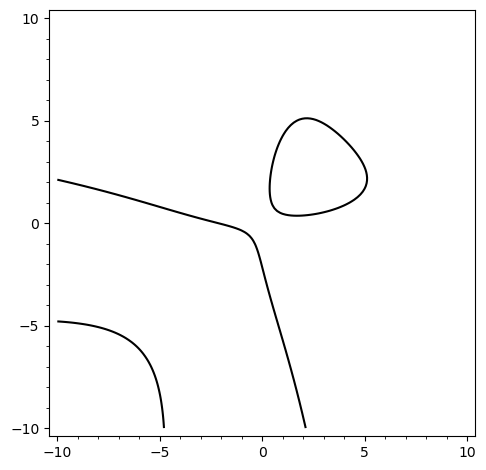

In [55]:
# S3_Quartic_new = x^3 * z + y^3 * z + x^2 * y^2 - 25*x*y*z^2 + 10*z^4
R.<x,y> = PolynomialRing(RR)
maxval=10
S3_Quartic_new_affine = x^3 + y^3 + x^2 * y^2 - 25*x*y + 10
implicit_plot(S3_Quartic_new_affine,(-maxval,maxval),(-maxval,maxval),color='black')

In [56]:
F=QQ; T.<x,y,z>=PolynomialRing(F)
S3_Quartic_new = x^3 * z + y^3 * z + x^2 * y^2 - 25*x*y*z^2 + 10*z^4
S3_Bitangents = compute_bitangents(S3_Quartic_new)
S3_Bitangents = [normalize(bitangent) for bitangent in S3_Bitangents];S3_Bitangents

[x + 5.986*y + (-3.5969)*z,
 x + 0.1671*y + (-0.6009)*z,
 x + 21.3313*y + (-111.3802)*z,
 x + y + (-8.5938)*z,
 x + 0.0469*y + (-5.2214)*z,
 z,
 x + 0.2806*y + 0.5977*z,
 x + 3.5635*y + 2.1298*z,
 x + (-1.7818 - 3.0861*I)*y + (-1.0649 + 1.8444*I)*z,
 x + (-1.7818 + 3.0861*I)*y + (-1.0649 - 1.8444*I)*z,
 x + (-0.1403 - 0.243*I)*y + (-0.2988 + 0.5176*I)*z,
 x + (-0.1403 + 0.243*I)*y + (-0.2988 - 0.5176*I)*z,
 x + (-0.5 - 0.866*I)*y + (0.6983 + 4.0658*I)*z,
 x + (-0.5 + 0.866*I)*y + (0.6983 - 4.0658*I)*z,
 x + (-0.0234 + 0.0406*I)*y + (2.6107 + 4.5219*I)*z,
 x + (-0.0234 - 0.0406*I)*y + (2.6107 - 4.5219*I)*z,
 x + (-0.5 - 0.866*I)*y + (-3.8702 + 1.4282*I)*z,
 x + (-0.5 + 0.866*I)*y + (-3.8702 - 1.4282*I)*z,
 x + (-0.5 + 0.866*I)*y + (4.2969 + 7.4425*I)*z,
 x + (-0.5 - 0.866*I)*y + (4.2969 - 7.4425*I)*z,
 x + (-10.6656 + 18.4734*I)*y + (55.6901 + 96.458*I)*z,
 x + (-10.6656 - 18.4734*I)*y + (55.6901 - 96.458*I)*z,
 x + (-0.0835 + 0.1447*I)*y + (0.3004 + 0.5204*I)*z,
 x + (-0.0835 - 0.1447*

## (IX) Dictionary

In [57]:
S3_elts=[ [ [ 0, 1, 0 ], [ 1, 0, 0 ], [ 0, 0, 1 ] ],
  [ [ 0, E(3)^2, 0 ], [ E(3), 0, 0 ], [ 0, 0, 1 ] ],
  [ [ 0, E(3), 0 ], [ E(3)^2, 0, 0 ], [ 0, 0, 1 ] ],
  [ [ 1, 0, 0 ], [ 0, 1, 0 ], [ 0, 0, 1 ] ],
  [ [ E(3)^2, 0, 0 ], [ 0, E(3), 0 ], [ 0, 0, 1 ] ],
  [ [ E(3), 0, 0 ], [ 0, E(3)^2, 0 ], [ 0, 0, 1 ] ] ];

keys = ['r' + str(j) for j in range(0,6)]
S3_dict = {}
for j in range(0,6):
    S3_dict.update({keys[j]:matrix(CC,S3_elts[j],immutable=True)});

## (IX) Orbits

In [58]:
triv_orbit = [[1,23,22,26,27,0],[14,21,15,20,2,4],[6,10,11,8,7,9]]
C2_orbit = [[18,19,3],[12,24,17],[16,25,13]]
S3_orbit = [[5]]

orbit_indices = triv_orbit + C2_orbit
all_orbit_indices = flatten(orbit_indices)
list_of_bitangent_orbits = []
for o in orbit_indices:
    orbit = []
    for b_index in o:
        orbit.append(C6_Bitangents[b_index])
    list_of_bitangent_orbits.append(orbit)

print('Orbits of bitangents: ' + str(list_of_bitangent_orbits) + '\n')
print('Remaining bitangents:\n')
for j in range(0,len(S3_Bitangents)):
    if not j in all_orbit_indices:
        print(str(j) + ': ' + str(S3_Bitangents[j]))

Orbits of bitangents: [[y + (0.464158880000000 + 0.803946770000000*I)*z, x + (-1.85047000000000)*y + (-0.196410000000000 - 0.340200000000000*I)*z, x + (0.707560000000000 + 0.235070000000000*I)*y + (0.367170000000000 + 0.391990000000000*I)*z, x + 1.85047000000000*y + (0.196410000000000 - 0.340200000000000*I)*z, y, y - 0.928317770000000*z], [x + (-0.561250000000000*I)*y + (1.02401000000000 + 0.591210000000000*I)*z, x + (-0.707560000000000 - 0.235070000000000*I)*y + (-0.367170000000000 - 0.391990000000000*I)*z, x + (-0.707560000000000 - 0.235070000000000*I)*y + (-0.155890000000000 + 0.513970000000000*I)*z, x + (0.707560000000000 - 0.235070000000000*I)*y + (0.367170000000000 - 0.391990000000000*I)*z, y + (0.464158880000000 - 0.803946770000000*I)*z, x - 1.85047000000000*y + 0.392830000000000*z], [x + (-0.561250000000000*I)*y + (-1.18243000000000*I)*z, x + (-0.707560000000000 - 0.235070000000000*I)*y + (0.523060000000000 - 0.121980000000000*I)*z, x + (-0.561250000000000*I)*y + (-1.0240100000

In [59]:
investigate_orbit(S3_Bitangents[13],S3_dict)

x + (-0.5 - 0.866*I)*y + (-3.8703 + 1.4282*I)*z
x + (-0.5 - 0.866*I)*y + (-3.8702 + 1.4282*I)*z
x + y + (3.172 + 2.6377*I)*z
x + (-0.5 + 0.8661*I)*y + (0.6983 - 4.0659*I)*z
x + (-0.5 + 0.866*I)*y + (0.6983 - 4.0658*I)*z
x + y + (3.1719 + 2.6376*I)*z
I think isotropy is generated by:

r3


# Type X: The $K_4$ quartic<a name="K4"></a>
We now look at a quartic with an action by the Klein four group, given by the equation $$X^4 + Y^4 + Z^4 + aX^2 Y^2 + bY^2Z^2 + c Z^2 X^2$$ with action given by $$\text{diag}[-1,1,1] \qquad \text{and}\qquad \text{diag}[1,-1,1]$$

## Old

In [60]:
K4_Quartic = x^4 + y^4 + z^4 + x^2*y^2 + y^2*z^2 + z^2*x^2
K4_Bitangents = compute_bitangents(K4_Quartic)
K4_Bitangents = [normalize(bitangent) for bitangent in K4_Bitangents]

# There are three subgroups of K4, the left, middle, and diagonal copies of C2
left_generator = matrix([[-1,0,0],[0,1,0],[0,0,1]])
right_generator = matrix([[1,0,0],[0,-1,0],[0,0,1]])
diagonal_generator = matrix([[-1,0,0],[0,-1,0],[0,0,1]])

# Make different lists to indicate different isotropy subgroups
left_isotropy_indices = [[0,1],[2,3]]
right_isotropy_indices = [[16,18],[17,19]]
diagonal_isotropy_indices = [[24,26],[25,27]]
remaining_orbits = [[12,13,20,21],[4,5,6,7],[8,9,10,11],[14,15,22,23]]
orbit_indices = left_isotropy_indices + right_isotropy_indices + diagonal_isotropy_indices + remaining_orbits
# Flatten the union
all_orbit_indices = flatten(orbit_indices)

# Get the running list of orbits that we have
list_of_bitangent_orbits = []
for o in orbit_indices:
    orbit = []
    for b_index in o:
        orbit.append(K4_Bitangents[b_index])
    list_of_bitangent_orbits.append(orbit)

# remaining_bitangents = rescaled_C3_Bitangents

print('Orbits of bitangents: ' + str(list_of_bitangent_orbits) + '\n')
print('Remaining bitangents:\n')
for j in range(0,len(K4_Bitangents)):
    if not j in all_orbit_indices:
        print(str(j) + ': ' + str(K4_Bitangents[j]))

Orbits of bitangents: [[y + (-0.5774 - 0.8165*I)*z, y + (-0.5774 + 0.8165*I)*z], [y + (0.5774 + 0.8165*I)*z, y + (0.5774 - 0.8165*I)*z], [x + (-0.5774 - 0.8165*I)*z, x + (0.5774 + 0.8165*I)*z], [x + (-0.5774 + 0.8165*I)*z, x + (0.5774 - 0.8165*I)*z], [x + (-0.5774 - 0.8165*I)*y, x + (0.5774 + 0.8165*I)*y], [x + (-0.5774 + 0.8165*I)*y, x + (0.5774 - 0.8165*I)*y], [x + y - z, x - y + z, x - y - z, x + y + z], [x + (-1.4142*I)*y - z, x + 1.4142*I*y + z, x + 1.4142*I*y - z, x + (-1.4142*I)*y + z], [x + y + 1.4142*I*z, x - y + (-1.4142*I)*z, x - y + 1.4142*I*z, x + y + (-1.4142*I)*z], [x + 0.7071*I*y + (-0.7071*I)*z, x + (-0.7071*I)*y + 0.7071*I*z, x + (-0.7071*I)*y + (-0.7071*I)*z, x + 0.7071*I*y + 0.7071*I*z]]

Remaining bitangents:



In [61]:
candidate_orbit(K4_Bitangents[25],[left_generator,right_generator,diagonal_generator])

x + (-0.5774 + 0.8165*I)*y
x + (0.5774 - 0.8165*I)*y
x + (0.5774 - 0.8165*I)*y
x + (-0.5774 + 0.8165*I)*y
I think isotropy is generated by:

[-1  0  0]
[ 0 -1  0]
[ 0  0  1]


So the orbits for bitangents on our $K_4$-equivariant quartic have the form
$$2[K_4/C_2^L] + 2[K_4/C_2^\Delta] + 2[K_4/C_2^R] + 4[K_4/e]$$

## (X) New

In [62]:
F=QQ; T.<x,y,z>=PolynomialRing(F)

K4_Quartic_new = x^4 + y^4 + z^4 -9*x^2*y^2 - 3*y^2*z^2 - 8*x^2*z^2

K4_Bitangents_new = compute_bitangents(K4_Quartic_new)
K4_Bitangents_new = [normalize(bitangent) for bitangent in K4_Bitangents_new];K4_Bitangents_new

[y + (-0.7184*I)*z,
 y + 0.7184*I*z,
 y + 1.2288*I*z,
 y + (-1.2288*I)*z,
 x + 2.4988*y + (-1.5687)*z,
 x + (-2.4988)*y + 1.5687*z,
 x + 0.655*y + (-0.6375)*z,
 x + (-0.655)*y + 0.6375*z,
 x + 0.4002*y + (-0.4112)*z,
 x + (-0.4002)*y + 0.4112*z,
 x + 1.5268*y + (-2.432)*z,
 x + (-1.5268)*y + 2.432*z,
 x + (-1.5268)*y + (-2.432)*z,
 x + 1.5268*y + 2.432*z,
 x + (-0.4002)*y + (-0.4112)*z,
 x + 0.4002*y + 0.4112*z,
 x + (-0.655)*y + (-0.6375)*z,
 x + 0.655*y + 0.6375*z,
 x + (-2.4988)*y + (-1.5687)*z,
 x + 2.4988*y + 1.5687*z,
 x + (-0.2481*I)*z,
 x + 0.2481*I*z,
 x + 1.0273*I*z,
 x + (-1.0273*I)*z,
 x + (-0.2496*I)*y,
 x + 0.2496*I*y,
 x + 1.1566*I*y,
 x + (-1.1566*I)*y]

## (X) Dictionary

In [63]:
K4_dict = {}
K4_dict.update({'id':matrix(CC,[[1,0,0],[0,1,0],[0,0,1]],immutable=True)})
K4_dict.update({'leftgen':matrix(CC,[[-1,0,0],[0,1,0],[0,0,1]],immutable=True)})
K4_dict.update({'rightgen':matrix(CC,[[1,0,0],[0,-1,0],[0,0,1]],immutable=True)})
K4_dict.update({'diaggen':matrix(CC,[[-1,0,0],[0,-1,0],[0,0,1]],immutable=True)})

## (X) Orbits

In [64]:
# e_orb = [[4,5,18,19],[6,7,16,17],[8,9,14,15],[10,11,12,13],[20,21,24,25]]
# C2L = [[0,1],[2,3]]
# C2R = [[22,23],[26,27]]

orbit_indices = []
# Flatten the union
all_orbit_indices = flatten(orbit_indices)

# Get the running list of orbits that we have
list_of_bitangent_orbits = []
for o in orbit_indices:
    orbit = []
    for b_index in o:
        orbit.append(K4_Bitangents_new[b_index])
    list_of_bitangent_orbits.append(orbit)

print('Orbits of bitangents: ' + str(list_of_bitangent_orbits) + '\n')
print('Remaining bitangents:\n')
for j in range(0,len(K4_Bitangents_new)):
    if not j in all_orbit_indices:
        print(str(j) + ': ' + str(K4_Bitangents_new[j]))

Orbits of bitangents: []

Remaining bitangents:

0: y + (-0.7184*I)*z
1: y + 0.7184*I*z
2: y + 1.2288*I*z
3: y + (-1.2288*I)*z
4: x + 2.4988*y + (-1.5687)*z
5: x + (-2.4988)*y + 1.5687*z
6: x + 0.655*y + (-0.6375)*z
7: x + (-0.655)*y + 0.6375*z
8: x + 0.4002*y + (-0.4112)*z
9: x + (-0.4002)*y + 0.4112*z
10: x + 1.5268*y + (-2.432)*z
11: x + (-1.5268)*y + 2.432*z
12: x + (-1.5268)*y + (-2.432)*z
13: x + 1.5268*y + 2.432*z
14: x + (-0.4002)*y + (-0.4112)*z
15: x + 0.4002*y + 0.4112*z
16: x + (-0.655)*y + (-0.6375)*z
17: x + 0.655*y + 0.6375*z
18: x + (-2.4988)*y + (-1.5687)*z
19: x + 2.4988*y + 1.5687*z
20: x + (-0.2481*I)*z
21: x + 0.2481*I*z
22: x + 1.0273*I*z
23: x + (-1.0273*I)*z
24: x + (-0.2496*I)*y
25: x + 0.2496*I*y
26: x + 1.1566*I*y
27: x + (-1.1566*I)*y


In [65]:
investigate_orbit(K4_Bitangents_new[24],K4_dict)

x + 0.2496*I*y
x + (-0.2496*I)*y
I think isotropy is generated by:

id
diaggen


# Type XI: The $C_3$ quartic<a name="C3"></a>
The first one we're trying is the one with automorphism group $C_3$ which we will call `C3_Quartic`. The associated list of bitangents is `C3_Bitangents`.

In [66]:
C3_Quartic = z^3*y + x*(x-y)*(x-2*y)*(x-3*y)
C3_Bitangents = compute_bitangents(C3_Quartic)
rescaled_C3_Bitangents = [normalize(bitangent) for bitangent in C3_Bitangents]
# for j in range(0,len(rescaled_C3_Bitangents)):
#     print(str(j) + ': ' + str(rescaled_C3_Bitangents[j]))

In [67]:
# The action generating the C3 orbit
rho = exp(2*pi*i/3)
M = matrix([[1,0,0],[0,1,0],[0,0,rho]])

orbit_indices = [[1,15,16],[2,11,12],[5,14,19],[0,25,26],[3,18,23],[27],[4,17,24],[6,13,20],[7,10,21],[8,9,22]]
all_orbit_indices = flatten(orbit_indices)

# Get the running list of orbits that we have
list_of_bitangent_orbits = []
for o in orbit_indices:
    orbit = []
    for b_index in o:
        orbit.append(rescaled_C3_Bitangents[b_index])
    list_of_bitangent_orbits.append(orbit)

# remaining_bitangents = rescaled_C3_Bitangents

# gp_action(M,rescaled_C3_Bitangents[22])
print('Orbits of bitangents: ' + str(list_of_bitangent_orbits) + '\n')
print('Remaining bitangents:\n')
for j in range(0,len(rescaled_C3_Bitangents)):
    if not j in all_orbit_indices:
        print(str(j) + ': ' + str(rescaled_C3_Bitangents[j]))

Orbits of bitangents: [[y - z, y + (0.5 - 0.866*I)*z, y + (0.5 + 0.866*I)*z], [x + 0.2196*y + (-0.4022)*z, x + 0.2196*y + (0.2011 - 0.3483*I)*z, x + 0.2196*y + (0.2011 + 0.3483*I)*z], [x + (-1.5 - 0.482*I)*y + (0.983 + 0.5675*I)*z, x + (-1.5 - 0.482*I)*y + (-1.135*I)*z, x + (-1.5 - 0.482*I)*y + (-0.983 + 0.5675*I)*z], [x + (-3.2196)*y + 0.4022*z, x + (-3.2196)*y + (-0.2011 + 0.3483*I)*z, x + (-3.2196)*y + (-0.2011 - 0.3483*I)*z], [x + (-2.09 + 0.2091*I)*y + (0.5447 + 0.1393*I)*z, x + (-2.09 + 0.2091*I)*y + (-0.1518 - 0.5414*I)*z, x + (-2.09 + 0.2091*I)*y + (-0.393 + 0.4021*I)*z], [y], [x + (-2.09 - 0.2091*I)*y + (0.5447 - 0.1393*I)*z, x + (-2.09 - 0.2091*I)*y + (-0.1518 + 0.5414*I)*z, x + (-2.09 - 0.2091*I)*y + (-0.393 - 0.4021*I)*z], [x + (-1.5 + 0.482*I)*y + (0.983 - 0.5675*I)*z, x + (-1.5 + 0.482*I)*y + 1.135*I*z, x + (-1.5 + 0.482*I)*y + (-0.983 - 0.5675*I)*z], [x + (-0.91 + 0.2091*I)*y + (0.393 + 0.4021*I)*z, x + (-0.91 + 0.2091*I)*y + (0.1518 - 0.5414*I)*z, x + (-0.91 + 0.2091*I)

Okay so now we know the orbits of the $C_3$-equivariant quartic: $9[C_3/e]+[C_3/C_3]$

# Type XII: The $C_2$ quartic

## (XII) Old

In [68]:
L2 = y^2 - z^2
L4 = y^4 - y^2*z^2 + z^4
C2_Quartic = x^4 + x^2*L2 + L4

C2_Bitangents = compute_bitangents(C2_Quartic);
C2_Bitangents = [normalize(b) for b in C2_Bitangents]

e_orbits = [[0],[1],[2],[3]]
C2_orbits = [[4,5],[6,7],[8,9],[10,11],[12,14],[13,15],[16,17],[18,19],[20,21],[22,23],[24,26],[25,27]]

C2_Bitangents

[y + (-0.8165 - 0.5774*I)*z,
 y + (-0.8165 + 0.5774*I)*z,
 y + (0.8165 + 0.5774*I)*z,
 y + (0.8165 - 0.5774*I)*z,
 x + (-1.4142*I)*y + 1.0*I*z,
 x + 1.4142*I*y + (-1.0*I)*z,
 x + y + (-1.4142)*z,
 x - y + 1.4142*z,
 x - y + (-1.4142)*z,
 x + y + 1.4142*z,
 x + 1.4142*I*y + 1.0*I*z,
 x + (-1.4142*I)*y + (-1.0*I)*z,
 x + (-0.8165 - 0.5774*I)*z,
 x + (-0.8165 + 0.5774*I)*z,
 x + (0.8165 + 0.5774*I)*z,
 x + (0.8165 - 0.5774*I)*z,
 x + 0.7071*I*y + (-0.7071)*z,
 x + (-0.7071*I)*y + 0.7071*z,
 x + y + 1.0*I*z,
 x - y + (-1.0*I)*z,
 x + (-0.7071*I)*y + (-0.7071)*z,
 x + 0.7071*I*y + 0.7071*z,
 x - y + 1.0*I*z,
 x + y + (-1.0*I)*z,
 x + (-0.5774 - 0.8165*I)*y,
 x + (-0.5774 + 0.8165*I)*y,
 x + (0.5774 + 0.8165*I)*y,
 x + (0.5774 - 0.8165*I)*y]

In [69]:
m = matrix(CC,[[-1,0,0],[0,1,0],[0,0,1]])
print(C2_Bitangents[4])
gp_action(m,C2_Bitangents[4])

x + (-1.4142*I)*y + 1.0*I*z


x + 1.4142*I*y + (-1.0*I)*z

## (XII) New

In [70]:
L2_new = -y^2 - 4*z^2
L4_new = y^4 - y^2*z^2 - z^4
C2_Quartic_new = x^4 + x^2*L2_new + L4_new

C2_Bitangents_new = compute_bitangents(C2_Quartic_new);
C2_Bitangents_new = [normalize(b) for b in C2_Bitangents_new]

## (XII) Orbits
The action is given by the diagonal matrix $\begin{pmatrix} -1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{pmatrix}$ so it just flips the sign on the $x$ (or on both $y$ and $z$), so we can eyeball the orbits. Note if the coefficient on $x$ is trivial then the action doesn't affect the bitangent.

In [71]:
e_orbs = []
# [[0],[1],[2],[3]]
C2_orbs = []
# [[4,5],[6,7],[8,9],[10,11],[12,13],[14,15],[16,17],..]
orbit_indices = e_orbs + C2_orbs
all_orbit_indices = flatten(orbit_indices)

# Get the running list of orbits that we have
list_of_bitangent_orbits = []
for o in orbit_indices:
    orbit = []
    for b_index in o:
        orbit.append(C2_Bitangents_new[b_index])
    list_of_bitangent_orbits.append(orbit)

print('Orbits of bitangents: ' + str(list_of_bitangent_orbits) + '\n')
print('Remaining bitangents:\n')
for j in range(0,len(C2_Bitangents_new)):
    if not j in all_orbit_indices:
        print(str(j) + ': ' + str(C2_Bitangents_new[j]))

Orbits of bitangents: []

Remaining bitangents:

0: y + (-2.2948)*z
1: y + 2.2948*z
2: y + (-1.1252*I)*z
3: y + 1.1252*I*z
4: x + (0.9682 + 0.25*I)*y + (-0.9937 - 0.4872*I)*z
5: x + (-0.9682 - 0.25*I)*y + (0.9937 + 0.4872*I)*z
6: x + (0.9682 - 0.25*I)*y + (-0.9937 + 0.4872*I)*z
7: x + (-0.9682 + 0.25*I)*y + (0.9937 - 0.4872*I)*z
8: x + (-0.7906 - 0.6124*I)*y + (-0.3978 + 0.8113*I)*z
9: x + (0.7906 + 0.6124*I)*y + (0.3978 - 0.8113*I)*z
10: x + (-0.7906 + 0.6124*I)*y + (-0.3978 - 0.8113*I)*z
11: x + (0.7906 - 0.6124*I)*y + (0.3978 + 0.8113*I)*z
12: x + (0.7906 - 0.6124*I)*y + (-0.3978 - 0.8113*I)*z
13: x + (-0.7906 + 0.6124*I)*y + (0.3978 + 0.8113*I)*z
14: x + (0.7906 + 0.6124*I)*y + (-0.3978 + 0.8113*I)*z
15: x + (-0.7906 - 0.6124*I)*y + (0.3978 - 0.8113*I)*z
16: x + (-0.9682 - 0.25*I)*y + (-0.9937 - 0.4872*I)*z
17: x + (0.9682 + 0.25*I)*y + (0.9937 + 0.4872*I)*z
18: x + (-0.9682 + 0.25*I)*y + (-0.9937 + 0.4872*I)*z
19: x + (0.9682 - 0.25*I)*y + (0.9937 - 0.4872*I)*z
20: x + (-2.5032)*z

The action of $m$ leaves the bitangent stable if there's no $x$ coefficient, otherwise it swaps the sign on the $y$ and $z$ coefficients.

In [72]:
2+2

4

# Trott / Blum-Guinand

In [73]:
Trott = 144*(x^4+y^4) - 255*(x^2+y^2)*z^2 + 350*x^2*y^2+81*z^4
Trott_bis = compute_bitangents(Trott);Trott_bis


[(-1.0789206623656498 + 0.5507999555567185*I)*y + z,
 (-1.0789206623656498 - 0.5507999555567185*I)*y + z,
 (1.0789206623656498 - 0.5507999555567185*I)*y + z,
 (1.0789206623656498 + 0.5507999555567185*I)*y + z,
 (-1.0534120923965482*I)*x + (-2.0634498260329526)*y + z,
 1.0534120923965482*I*x + (-2.0634498260329526)*y + z,
 (-0.6461670724975701)*x + (-0.6461670724975701)*y + z,
 0.6461670724975701*x + (-0.6461670724975701)*y + z,
 (-0.6461670724975701)*x + 0.6461670724975701*y + z,
 0.6461670724975701*x + 0.6461670724975701*y + z,
 (-1.0534120923965482*I)*x + 2.0634498260329526*y + z,
 1.0534120923965482*I*x + 2.0634498260329526*y + z,
 (-2.0634498260329526)*x + 1.0534120923965482*I*y + z,
 2.0634498260329526*x + 1.0534120923965482*I*y + z,
 (-2.0634498260329526)*x + (-1.0534120923965482*I)*y + z,
 2.0634498260329526*x + (-1.0534120923965482*I)*y + z,
 (-1.2657281447187063*I)*x + (-1.2657281447187063*I)*y + z,
 1.2657281447187063*I*x + (-1.2657281447187063*I)*y + z,
 (-1.2657281447187063

*Weird*: Why are some of them complex?

# Edge quartic

In [74]:
Edge = 25*(x^4 + y^4 + z^4) -34*(x^2*y^2 + x^2*z^2 + y^2*z^2)
Edge_bis = compute_bitangents(Edge);
Edge_bis = [normalize(b) for b in Edge_bis];Edge_bis

[y + (-0.5)*z,
 y + (-2.0)*z,
 y + 2.0*z,
 y + 0.5*z,
 x + y + (-0.6)*z,
 x - y + 0.6*z,
 x + 0.6*y - z,
 x + (-0.6)*y + z,
 x + (-0.6)*y - z,
 x + 0.6*y + z,
 x - y + (-0.6)*z,
 x + y + 0.6*z,
 x + y - z,
 x + 1.6667*y + (-1.6667)*z,
 x + (-1.6667)*y + 1.6667*z,
 x - y + z,
 x + (-0.5)*z,
 x + (-2.0)*z,
 x + 2.0*z,
 x + 0.5*z,
 x - y - z,
 x + (-1.6667)*y + (-1.6667)*z,
 x + 1.6667*y + 1.6667*z,
 x + y + z,
 x + (-0.5)*y,
 x + (-2.0)*y,
 x + 2.0*y,
 x + 0.5*y]

In [75]:
c2r1 = [[16,19,0,3],[1,18,2,17]]
c2r5 = [[11,10,5,4],[20,15,23,12]]
e_istrop = [[21,13,7,9,14,22,6,8]]
c2_r0 = [[24,25,26,27]]

orbit_indices = c2r1 + c2r5 + e_istrop

all_orbit_indices = flatten(orbit_indices)

# Get the running list of orbits that we have
list_of_bitangent_orbits = []
for o in orbit_indices:
    orbit = []
    for b_index in o:
        orbit.append(Edge_bis[b_index])
    list_of_bitangent_orbits.append(orbit)

print('Orbits of bitangents: ' + str(list_of_bitangent_orbits) + '\n')
print('Remaining bitangents:\n')
for j in range(0,len(Edge_bis)):
    if not j in all_orbit_indices:
        print(str(j) + ': ' + str(Edge_bis[j]))

Orbits of bitangents: [[x + (-0.5)*z, x + 0.5*z, y + (-0.5)*z, y + 0.5*z], [y + (-2.0)*z, x + 2.0*z, y + 2.0*z, x + (-2.0)*z], [x + y + 0.6*z, x - y + (-0.6)*z, x - y + 0.6*z, x + y + (-0.6)*z], [x - y - z, x - y + z, x + y + z, x + y - z], [x + (-1.6667)*y + (-1.6667)*z, x + 1.6667*y + (-1.6667)*z, x + (-0.6)*y + z, x + 0.6*y + z, x + (-1.6667)*y + 1.6667*z, x + 1.6667*y + 1.6667*z, x + 0.6*y - z, x + (-0.6)*y - z]]

Remaining bitangents:

24: x + (-0.5)*y
25: x + (-2.0)*y
26: x + 2.0*y
27: x + 0.5*y


## Edge with $S_4$

In [76]:
TypeIV_S4 = [ [ [ -1, 0, 0 ], [ 0, -1, 0 ], [ 0, 0, 1 ] ],
  [ [ -1, 0, 0 ], [ 0, 0, -1 ], [ 0, -1, 0 ] ],
  [ [ -1, 0, 0 ], [ 0, 0, 1 ], [ 0, 1, 0 ] ],
  [ [ -1, 0, 0 ], [ 0, 1, 0 ], [ 0, 0, -1 ] ],
  [ [ 0, -1, 0 ], [ -1, 0, 0 ], [ 0, 0, -1 ] ],
  [ [ 0, -1, 0 ], [ 0, 0, -1 ], [ 1, 0, 0 ] ],
  [ [ 0, -1, 0 ], [ 0, 0, 1 ], [ -1, 0, 0 ] ],
  [ [ 0, -1, 0 ], [ 1, 0, 0 ], [ 0, 0, 1 ] ],
  [ [ 0, 0, -1 ], [ -1, 0, 0 ], [ 0, 1, 0 ] ],
  [ [ 0, 0, -1 ], [ 0, -1, 0 ], [ -1, 0, 0 ] ],
  [ [ 0, 0, -1 ], [ 0, 1, 0 ], [ 1, 0, 0 ] ],
  [ [ 0, 0, -1 ], [ 1, 0, 0 ], [ 0, -1, 0 ] ],
  [ [ 0, 0, 1 ], [ -1, 0, 0 ], [ 0, -1, 0 ] ],
  [ [ 0, 0, 1 ], [ 0, -1, 0 ], [ 1, 0, 0 ] ],
  [ [ 0, 0, 1 ], [ 0, 1, 0 ], [ -1, 0, 0 ] ],
  [ [ 0, 0, 1 ], [ 1, 0, 0 ], [ 0, 1, 0 ] ],
  [ [ 0, 1, 0 ], [ -1, 0, 0 ], [ 0, 0, 1 ] ],
  [ [ 0, 1, 0 ], [ 0, 0, -1 ], [ -1, 0, 0 ] ],
  [ [ 0, 1, 0 ], [ 0, 0, 1 ], [ 1, 0, 0 ] ],
  [ [ 0, 1, 0 ], [ 1, 0, 0 ], [ 0, 0, -1 ] ],
  [ [ 1, 0, 0 ], [ 0, -1, 0 ], [ 0, 0, -1 ] ],
  [ [ 1, 0, 0 ], [ 0, 0, -1 ], [ 0, 1, 0 ] ],
  [ [ 1, 0, 0 ], [ 0, 0, 1 ], [ 0, -1, 0 ] ],
  [ [ 1, 0, 0 ], [ 0, 1, 0 ], [ 0, 0, 1 ] ] ]
Edge_S4_dict = {}
keys = ['r' + str(j) for j in range(0,24)]
for j in range(0,24):
    Edge_S4_dict.update({keys[j]:matrix(CC,TypeIV_S4[j],immutable=True)});

In [77]:
c2r20 = [[18,25,24,27,16,19,26,17,0,1,2,3]]
c2r4 = [[21,14,13,22,11,4,10,5,7,8,9,6]]

orbit_indices = c2r20 + c2r4

all_orbit_indices = flatten(orbit_indices)

# Get the running list of orbits that we have
list_of_bitangent_orbits = []
for o in orbit_indices:
    orbit = []
    for b_index in o:
        orbit.append(Edge_bis[b_index])
    list_of_bitangent_orbits.append(orbit)

print('Orbits of bitangents: ' + str(list_of_bitangent_orbits) + '\n')
print('Remaining bitangents:\n')
for j in range(0,len(Edge_bis)):
    if not j in all_orbit_indices:
        print(str(j) + ': ' + str(Edge_bis[j]))

Orbits of bitangents: [[x + 2.0*z, x + (-2.0)*y, x + (-0.5)*y, x + 0.5*y, x + (-0.5)*z, x + 0.5*z, x + 2.0*y, x + (-2.0)*z, y + (-0.5)*z, y + (-2.0)*z, y + 2.0*z, y + 0.5*z], [x + (-1.6667)*y + (-1.6667)*z, x + (-1.6667)*y + 1.6667*z, x + 1.6667*y + (-1.6667)*z, x + 1.6667*y + 1.6667*z, x + y + 0.6*z, x + y + (-0.6)*z, x - y + (-0.6)*z, x - y + 0.6*z, x + (-0.6)*y + z, x + (-0.6)*y - z, x + 0.6*y + z, x + 0.6*y - z]]

Remaining bitangents:

12: x + y - z
15: x - y + z
20: x - y - z
23: x + y + z


In [78]:
investigate_orbit(Edge_bis[12],Edge_S4_dict)

x + y - z
x - y - z
x - y + z
x + y + z
I think isotropy is generated by:

r2
r4
r11
r13
r17
r23


In [79]:
Edge_S4_dict['r4']

[0.000000000000000 -1.00000000000000 0.000000000000000]
[-1.00000000000000 0.000000000000000 0.000000000000000]
[0.000000000000000 0.000000000000000 -1.00000000000000]